<a href="https://colab.research.google.com/github/pseudo-xy/pseudo-xy/blob/main/linear_regression_on_a_gold_evolution_data_from_the_tarkwa_mines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd

from google.colab import files
upload = files.upload()

Saving gold_evolution.csv to gold_evolution (2).csv


In [92]:
data = pd.read_csv('gold_evolution.csv')
data.head()

,Month,Diesel_cost,NG_cost,Total_cost,Treated_tonnes,Treated_tonnes_per_cost
0,19-Jan,"191,908.00",0,"191,908.00","1,064,453.13",5.55
1,19-Feb,"196,602.40",0,"196,602.40","1,172,909.71",5.97
2,19-Mar,"177,788.49",0,"177,788.49","1,116,320.44",6.28
3,19-Apr,"217,006.44",0,"217,006.44","1,159,097.08",5.34
4,19-May,"210,688.77",0,"210,688.77","1,193,285.95",5.66


In [93]:
data.shape

(40, 6)

In [94]:
print(data.dtypes)

Month                        object
Diesel_cost                  object
NG_cost                      object
Total_cost                   object
Treated_tonnes               object
Treated_tonnes_per_cost     float64
dtype: object


In [95]:
# dropping columns with empty values 
new_data = data.dropna()
new_data.head()

,Month,Diesel_cost,NG_cost,Total_cost,Treated_tonnes,Treated_tonnes_per_cost
0,19-Jan,"191,908.00",0,"191,908.00","1,064,453.13",5.55
1,19-Feb,"196,602.40",0,"196,602.40","1,172,909.71",5.97
2,19-Mar,"177,788.49",0,"177,788.49","1,116,320.44",6.28
3,19-Apr,"217,006.44",0,"217,006.44","1,159,097.08",5.34
4,19-May,"210,688.77",0,"210,688.77","1,193,285.95",5.66


In [96]:
# removing the commas from the figures
data['Diesel_cost'] = data['Diesel_cost'].str.replace(',', '')
data['NG_cost'] = data['NG_cost'].str.replace(',', '')
data['Total_cost'] = data['Total_cost'].str.replace(',', '')
data['Treated_tonnes'] = data['Treated_tonnes'].str.replace(',', '')

In [97]:
data.head()

,Month,Diesel_cost,NG_cost,Total_cost,Treated_tonnes,Treated_tonnes_per_cost
0,19-Jan,191908.00,0,191908.00,1064453.13,5.55
1,19-Feb,196602.40,0,196602.40,1172909.71,5.97
2,19-Mar,177788.49,0,177788.49,1116320.44,6.28
3,19-Apr,217006.44,0,217006.44,1159097.08,5.34
4,19-May,210688.77,0,210688.77,1193285.95,5.66


In [98]:
# convert the column to int data type
data['Diesel_cost'] = data['Diesel_cost'].astype(float)
data['NG_cost'] = data['NG_cost'].astype(float)
data['Total_cost'] = data['Total_cost'].astype(float)
data['Treated_tonnes'] = data['Treated_tonnes'].astype(float)

In [99]:
print(data.dtypes)

Month                        object
Diesel_cost                 float64
NG_cost                     float64
Total_cost                  float64
Treated_tonnes              float64
Treated_tonnes_per_cost     float64
dtype: object


In [100]:
data.shape

(40, 6)

In [101]:
# setting the label (dependent variable)
label =['Treated_tonnes_per_cost ']

In [102]:
import matplotlib.pyplot as ply
import numpy as np

In [103]:
discrete_features = ['Diesel_cost', 'NG_cost', 'Total_cost', 'Treated_tonnes']
data[discrete_features + ['Treated_tonnes_per_cost ']].describe()

,Diesel_cost,NG_cost,Total_cost,Treated_tonnes,Treated_tonnes_per_cost
count,40.000000,40.000000,40.000000,4.000000e+01,40.000000
mean,153818.779500,25631.962250,179450.742250,1.152079e+06,6.829500
std,73616.754861,41543.887214,47649.143358,4.905150e+04,1.698648
min,35288.620000,0.000000,113057.990000,9.769152e+05,3.320000
25%,110602.570000,0.000000,140092.062500,1.129911e+06,5.522500
50%,145849.715000,0.000000,168740.010000,1.160029e+06,6.565000
75%,211104.157500,21512.572500,211104.157500,1.175470e+06,8.265000
max,342153.000000,116400.150000,342153.000000,1.240684e+06,10.330000


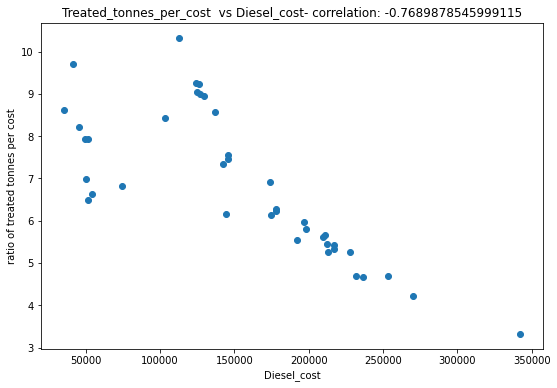

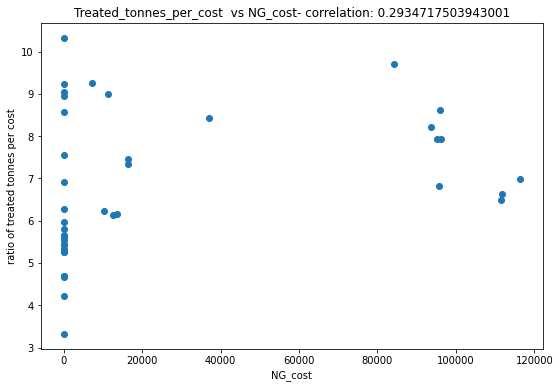

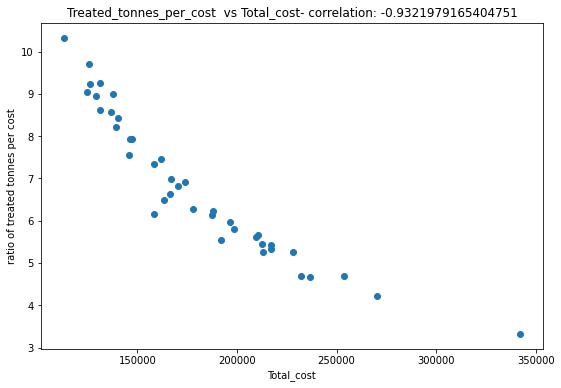

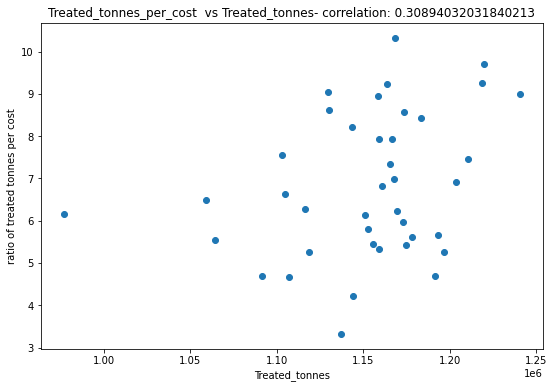

In [105]:
for col in discrete_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Treated_tonnes_per_cost ']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('ratio of treated tonnes per cost')
    ax.set_title('Treated_tonnes_per_cost  vs ' + col + '- correlation: ' + str(correlation))
plt.show()

In [114]:
# Separate features and labels
X, y = data[['Diesel_cost', 'NG_cost', 'Total_cost', 'Treated_tonnes']].values, data['Treated_tonnes_per_cost '].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 191908.         0.    191908.   1064453.13]
 [ 196602.4        0.    196602.4  1172909.71]
 [ 177788.49       0.    177788.49 1116320.44]
 [ 217006.44       0.    217006.44 1159097.08]
 [ 210688.77       0.    210688.77 1193285.95]
 [ 212924.8        0.    212924.8  1118579.67]
 [ 216869.5        0.    216869.5  1174655.  ]
 [ 228089.4        0.    228089.4  1196547.45]
 [ 198440.82       0.    198440.82 1152716.74]
 [ 236483.52       0.    236483.52 1107276.8 ]]

Labels:
[5.55 5.97 6.28 5.34 5.66 5.25 5.42 5.25 5.81 4.68]


In [115]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 28 rows
Test Set: 12 rows


In [116]:
# Train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# Fit a linear regression model on the training set
model_fit = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [117]:
# evaluating the model

import numpy as np

predictions = model_fit.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [9. 8. 9. 6. 6. 4. 7. 7. 8. 7.]
Actual labels   :  [9.23 8.96 9.   5.66 5.44 4.23 6.22 6.92 8.56 6.14]


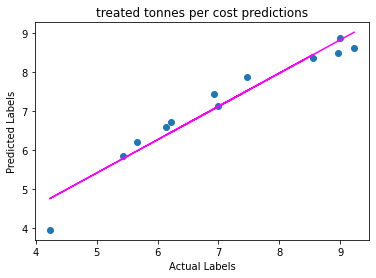

In [118]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('treated tonnes per cost predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [119]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.17648662285085256
RMSE: 0.4201031097847915
R2: 0.9261293517675457


In [120]:
# saving the model

import joblib

# Save the model as a pickle file
filename = './treated-tonness-per-cost.pkl'
joblib.dump(model_fit, filename)

['./treated-tonness-per-cost.pkl']

In [121]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[4.2,0,4.2,5.33]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} treated tonnes per cost'.format(np.round(result[0])))

New sample: [4.2, 0.0, 4.2, 5.33]
Prediction: 3 treated tonnes per cost
